In [1]:
from datetime import datetime

In [2]:
import pandas as pd

In [3]:
calendar = pd.read_csv('calendar.csv')

In [4]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,100326,2021-02-13,f,$33.00,$33.00,2.0,10.0
1,13913,2021-02-12,t,$40.00,$40.00,1.0,29.0
2,13913,2021-02-13,t,$40.00,$40.00,1.0,29.0
3,13913,2021-02-14,t,$40.00,$40.00,1.0,29.0
4,13913,2021-02-15,t,$40.00,$40.00,1.0,29.0


In [5]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27935194 entries, 0 to 27935193
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.5+ GB


In [6]:
listings = pd.read_csv('listings.csv')

In [7]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76534 entries, 0 to 76533
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            76534 non-null  int64  
 1   listing_url                                   76534 non-null  object 
 2   scrape_id                                     76534 non-null  int64  
 3   last_scraped                                  76534 non-null  object 
 4   name                                          76510 non-null  object 
 5   description                                   73372 non-null  object 
 6   neighborhood_overview                         46750 non-null  object 
 7   picture_url                                   76534 non-null  object 
 8   host_id                                       76534 non-null  int64  
 9   host_url                                      76534 non-null 

In [8]:
listings = listings.drop(['scrape_id', 'listing_url', 'last_scraped', 'picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url', 'neighbourhood_group_cleansed', 
                         'bathrooms', 'calendar_updated', 'license'], axis=1)  # irrelevant + null-only

In [9]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76534 entries, 0 to 76533
Data columns (total 63 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            76534 non-null  int64  
 1   name                                          76510 non-null  object 
 2   description                                   73372 non-null  object 
 3   neighborhood_overview                         46750 non-null  object 
 4   host_id                                       76534 non-null  int64  
 5   host_name                                     76488 non-null  object 
 6   host_since                                    76488 non-null  object 
 7   host_location                                 76307 non-null  object 
 8   host_about                                    42430 non-null  object 
 9   host_response_time                            33313 non-null 

In [10]:
print("Number of fields in listings: ", len(listings.columns))
print("Number of listings: ", len(listings))

Number of fields in listings:  63
Number of listings:  76534


# Some NLP

Here we extracted sentiment score given a simple English sentiment analyzer.

In [186]:
reviews = pd.read_csv('reviews.csv')

/home/ophelion/venv/nlp/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [187]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163888 entries, 0 to 1163887
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   listing_id     1163888 non-null  object 
 1   id             1163887 non-null  float64
 2   date           1163886 non-null  object 
 3   reviewer_id    1163886 non-null  float64
 4   reviewer_name  1163885 non-null  object 
 5   comments       1163374 non-null  object 
 6   review_score   1163885 non-null  float64
dtypes: float64(3), object(4)
memory usage: 62.2+ MB


In [188]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,review_score
0,13913,80770.0,2010-08-18,177109.0,Michael,My girlfriend and I hadn't known Alina before ...,0.9813
1,13913,367568.0,2011-07-11,19835707.0,Mathias,Alina was a really good host. The flat is clea...,0.8122
2,13913,529579.0,2011-09-13,1110304.0,Kristin,Alina is an amazing host. She made me feel rig...,0.9722
3,13913,595481.0,2011-10-03,1216358.0,Camilla,"Alina's place is so nice, the room is big and ...",0.9774
4,13913,612947.0,2011-10-09,490840.0,Jorik,"Nice location in Islington area, good for shor...",0.9027


In [189]:
from wordcloud import WordCloud, STOPWORDS

Let's see which words / qualities are the most important for the commenters, given a positive / negative review.

In [190]:
reviews_for_cloud = reviews.dropna()

In [195]:
stopwords = set(STOPWORDS)
stopwords.update(["London", "flat", "apartment", "place", "room", "house"])

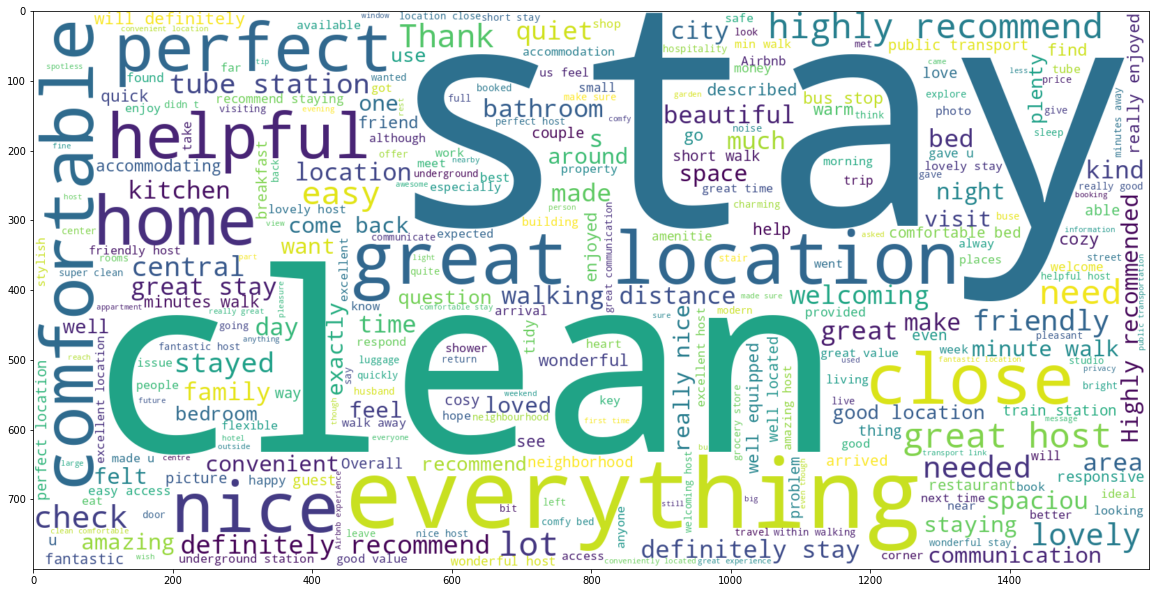

In [198]:
plt.figure(figsize = (20,20)) # HQ
wc = WordCloud(max_words = 300 , width = 1600 , height = 800 , stopwords = stopwords, background_color="white").generate(" ".join(reviews_for_cloud[reviews_for_cloud['review_score'] > 0.7].comments))
plt.imshow(wc , interpolation = 'bilinear')

Here we can see that the most important aspects for Airbnb clients appear to be host qualities (friendly, welcoming, needed, helpful, etc.), as well as location (great location, walking distance, everything, tube station, close) and the apartment itself (clean, home, comfortable, kitchen, great place).

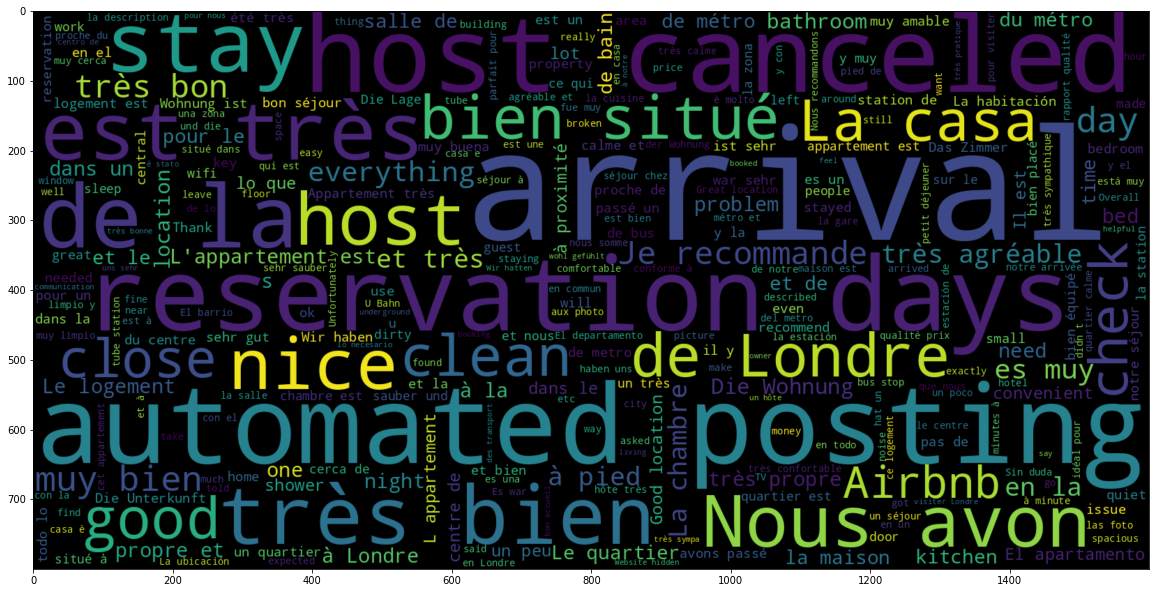

In [200]:
plt.figure(figsize = (20,20)) # HQ
wc = WordCloud(max_words = 300 , width = 1600 , height = 800 , stopwords = stopwords, background_color="black").generate(" ".join(reviews_for_cloud[reviews_for_cloud['review_score'] < 0.5].comments))
plt.imshow(wc , interpolation = 'bilinear')

Here it is obvious that host cancellation and automated posting seems to be the biggest problem. It is apparent that automated posts, reservation days and host cancellations seem to be the biggest problem, so stricter moderation is needed. It also appears that there are a lot of non-English comments in the dataset itself, so probably a better filtering is required. We can also assume that the more negative comments are rare, since comments in non-English language appear here more frequently.

In [104]:
import matplotlib
import matplotlib.pyplot as plt

In [105]:
new_hosts = pd.DataFrame(listings['host_since'].dropna().value_counts().sort_index())
new_hosts.index = pd.to_datetime(new_hosts.index)
new_hosts.index.name = 'Date'
new_hosts = new_hosts.groupby(pd.Grouper(level='Date',freq='M')).sum()
new_hosts.columns = ['Number of new hosts']

In [106]:
new_hosts.head()

,Number of new hosts
Date,
2008-08-31,1
2008-09-30,0
2008-10-31,0
2008-11-30,0
2008-12-31,8


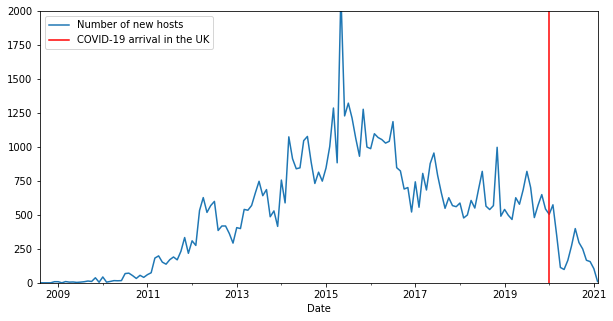

In [134]:
new_hosts.plot(figsize=(10,5), ylim=(0,2000))
plt.axvline('2020-01-31', color='r', label = 'COVID-19 arrival in the UK')
plt.legend()
plt.show()

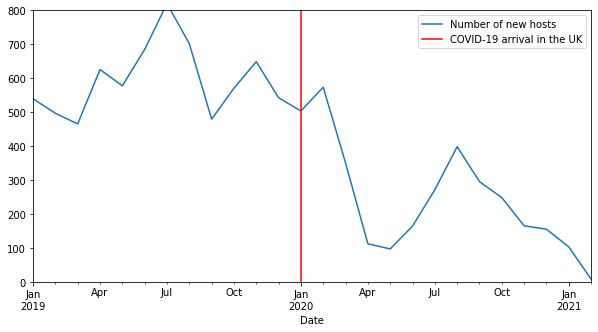

In [147]:
new_hosts.loc['2019' : '2023'].plot(y='Number of new hosts', figsize=(10,5), ylim=(0,800))
plt.axvline('2020-01-31', color='r', label = 'COVID-19 arrival in the UK')
plt.legend()
plt.show()

In [143]:
reviews_avg_date = pd.DataFrame(reviews[['date', 'review_score']].dropna())

In [146]:
avg_per_month = reviews_avg_date.groupby(pd.PeriodIndex(reviews_avg_date['date'], freq="M"))['review_score'].mean()

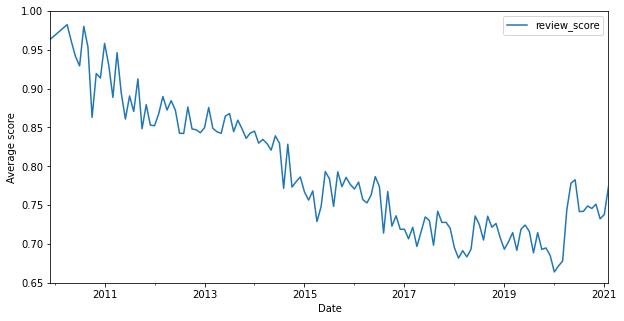

In [152]:
avg_per_month.plot(figsize=(10,5), ylim=(0.65,1))
plt.xlabel('Date') 
plt.ylabel('Average score') 
plt.legend()
plt.show()

Here we can see that the perceived quality of airbnb listings has steadily decreased, although there is a clear surge in average scores starting 2020 (Jan 2020 - arrival of COVID-19 in the UK). We can assume that only the best listings have managed to stay afloat during the pandemic.

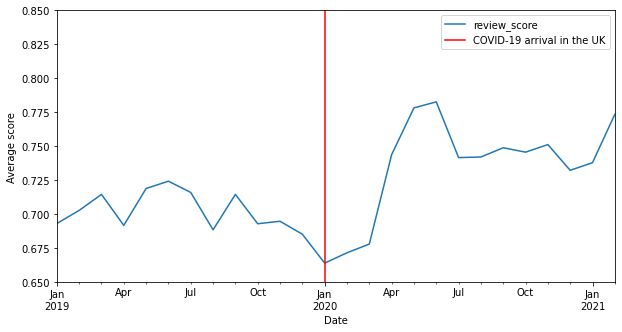

In [251]:
avg_per_month.loc['2019' : '2023'].plot(figsize=(10,5), ylim=(0.65,0.85))
plt.xlabel('Date') 
plt.ylabel('Average score')
plt.axvline('2020-01-31', color='r', label = 'COVID-19 arrival in the UK')
plt.legend()
plt.show()

In [161]:
neighbourhoods = listings.neighbourhood_cleansed

In [158]:
reviews_per_listing = reviews.groupby('listing_id')['review_score'].mean()

In [160]:
reviews_per_listing.dropna()

listing_id
13913      0.837138
15400      0.839346
17402      0.695476
25123      0.844711
33332      0.806733
             ...   
9191313    0.871769
9191887    0.611300
9192486    0.780077
9193827    0.625532
9196299    0.821611
Name: review_score, Length: 54342, dtype: float64

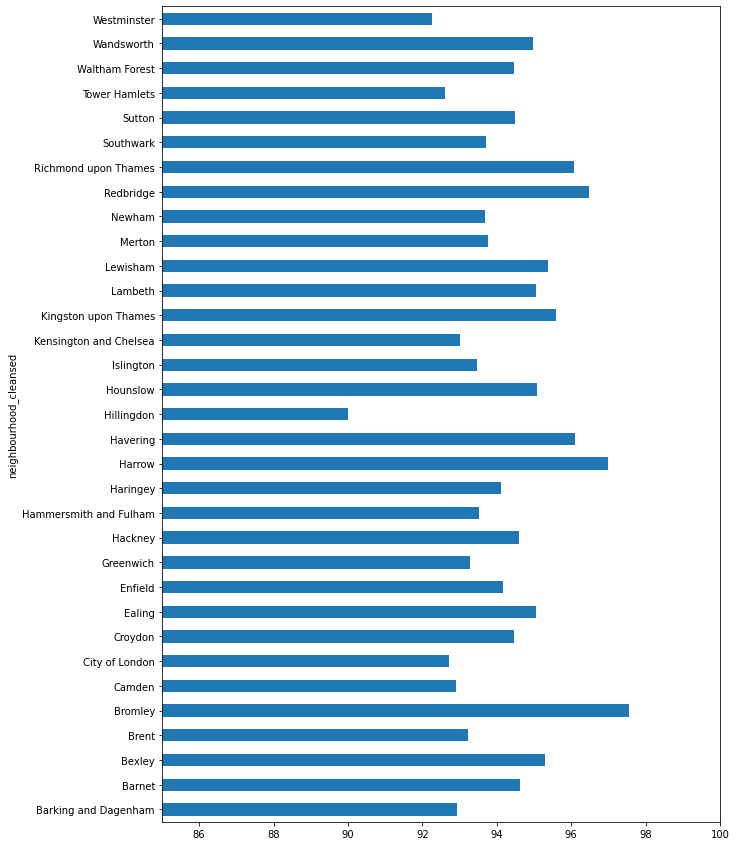

In [178]:
listings.dropna().groupby('neighbourhood_cleansed')['review_scores_rating'].mean().plot.barh(x='neighbourhood_cleansed', y='review_scores_rating', figsize=(10,15), xlim=(85,100))
plt.show()

Here we can see that neighbourhoods are about equal in their score ratings, however, Hillingdon clearly has the lowest score, whereas Bromley has the highest.

One more thing that I still have time to do in this document is try to detect any inherent bias given host name.

For this, I will be using ethnicolr library which attempts to predict ethnicity (as per Word D. L. et al. Demographic aspects of surnames from census 2000). For more information check https://pypi.org/project/ethnicolr/

In [237]:
from ethnicolr import census_ln

In [241]:
host_ethnicity = census_ln(listings[['host_name', 'review_scores_rating']], 'host_name')

In [242]:
host_ethnicity_scores

,host_name,review_scores_rating,pctwhite,pctblack,pctapi,pctaian,pct2prace,pcthispanic
2,Liz,94.0,8.69,(S),6.27,(S),1.57,82.76
4,Grace,96.0,73.58,20.18,1.44,0.54,2.20,2.06
8,Michael,97.0,86.36,7.62,1.13,0.73,1.93,2.23
9,Liz,96.0,8.69,(S),6.27,(S),1.57,82.76
14,Cesar,100.0,33.03,34.84,3.18,0.72,6.11,22.12
...,...,...,...,...,...,...,...,...
76176,David,100.0,65.29,13.75,10.50,1.84,2.60,6.03
76178,Tony,100.0,43.73,35.96,7.04,4.85,4.21,4.21
76265,Lydia,90.0,38.22,47.77,(S),(S),3.18,7.64
76271,Daniel,100.0,67.02,24.05,2.12,0.58,1.95,4.27


In [243]:
host_ethnicity = host_ethnicity_scores[['pctwhite','pctblack','pctapi','pctaian','pct2prace','pcthispanic']].replace('(S)',0).astype('float').idxmax(axis=1)

In [244]:
listings['ethnicity'] = host_ethnicity

In [245]:
listings.head()

,id,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,...,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,__last_name,ethnicity
0,13913,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,54730,Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,...,9.0,9.0,f,2,1,1,0,0.16,ALINA,NaN
1,15400,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,60302,Philippa,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a few hours,...,10.0,9.0,t,1,1,0,0,0.66,PHILIPPA,NaN
2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",67564,Liz,2010-01-04,"London, England, United Kingdom",We are Liz and Jack. We manage a number of ho...,a few days or more,...,10.0,9.0,f,15,15,0,0,0.35,LIZ,pcthispanic
3,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,Enjoy a chic stay in this elegant but fully mo...,Fulham is 'villagey' and residential – a real ...,67915,Charlotte,2010-01-05,"London, England, United Kingdom","Named best B&B by The Times. Easy going hosts,...",NaN,...,NaN,NaN,f,2,0,2,0,NaN,CHARLOTTE,NaN
4,25123,Clean big Room in London (Room 1),Big room with double bed/ clean sheets/ clean ...,Barnet is one of the largest boroughs in Londo...,103583,Grace,2010-04-05,"London, England, United Kingdom","Easy going, friendly\n\nAttentive to detail an...",NaN,...,9.0,10.0,t,3,0,3,0,0.98,GRACE,pctwhite


In [249]:
listings = listings.replace(['pctwhite', 'pcthispanic', 'pctblack', 'pctapi', 'pctaian', 'pct2prace'],
                           ['White', 'Hispanic', 'Black', 'Non-Hispanic Asian / Pacific Islander', 'Non-Hispanic American Indian and Alascan Native', 'Non-Hispanic of Two or More Races'])

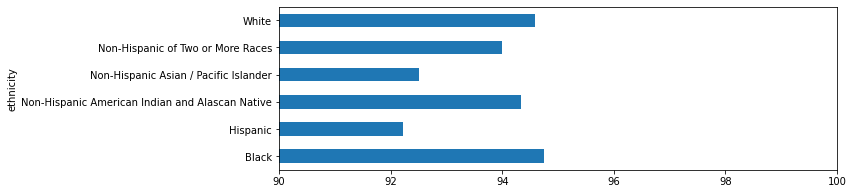

In [250]:
listings.dropna().groupby('ethnicity')['review_scores_rating'].mean().plot.barh(x='ethnicity', y='review_scores_rating', figsize=(10,3), xlim=(90,100))
plt.show()

Although there doesn't seem to be much bias present in terms of average score, there appears to be a slight correlation between a Hispanic / Asian name and a slightly lower (on average) score, which might be worth looking into.